# ADP - 머신러닝 코드 정리

1. 회귀분석
    - 회귀분석 평가 - (완료)
    -  statsmodel을 활용한 회귀 통계 분석 - (완료)
    - 잔차의 정규성/독립성/등분산성 확인 - (완료)
    - 변수선택법 - (완료)


2. 분류분석
    - 분류분석(RandomForest, gradientboost, 로지스틱회귀, 인공신경망 등의 각종 분류방법"
    - voting 등 각종 앙상블 방법

    - confusion matrix등 분류분석 평가


3. 기타 분석 3가지
    - 교차분석 - (완료)
    - 분산분석 - (완료)
    - 상관분석 - (완료)


4. 군집분석
    - KNN : https://firework-ham.tistory.com/27
    - SOM : http://jaynewho.com/post/7, https://www.infoking.site/37
    - EM 알고리즘 : https://zephyrus1111.tistory.com/89

5. 연관분석 (Aprori) : - (완료)  https://zephyrus1111.tistory.com/119

6. 표본추출과 T검정 : - (완료) https://ysyblog.tistory.com/115

7. 탐색적요인분석, 주성분분석 
    - 탐색적 요인분석 (FA) - (완료)
        - https://www.ibm.com/docs/ko/spss-statistics/25.0.0?topic=analysis-factor-extraction
        - https://m.blog.naver.com/y4769/220619149297
    - 주성분분석 (PCA) - (완료)
        - https://ysyblog.tistory.com/123?category=1170736
    
    - LEE, MDS - (완료)
        - https://www.analyticsvidhya.com/blog/2021/02/a-quick-introduction-to-manifold-learning/
        - https://stackabuse.com/guide-to-multidimensional-scaling-in-python-with-scikit-learn/

8. 시계열분석 (ARIMA) : https://wikidocs.net/50949

9. 타겟변수 불균형 처리 해결 - (완료)
    -  https://dining-developer.tistory.com/27
    - https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html
    - https://rfriend.tistory.com/507
    - https://rfriend.tistory.com/508
    - 언더샘플링, 오버샘플링, 업샘플링, 다운샘플링

10. 특징선택 : https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
    - 분산
    - 단일변수 선택
    - 특성중요도 계산

11. 기타 pandas 활용함수

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. 회귀분석
#     - 독립, 반응변수 관계를 회귀분석으로 정의/ 결과 해석
#     - 회귀분석 평가
#     -  statsmodel을 활용한 회귀 통계 분석
#     - 잔차의 정규성/독립성/등분산성 확인, 시각화
#     - 변수선택법(영향력 관측치와 영향 분석)
# --- 진행중(21-11-27) ---



In [ ]:
# 회귀분석 기본 정의, 결과 해석

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADP/cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


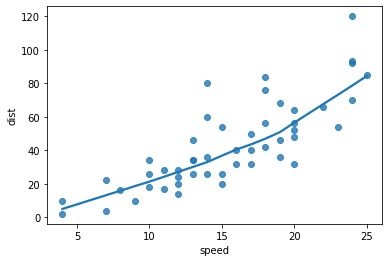

In [ ]:
# 사전 작업
## 산점도에 추세선을 넣어 데이터에 선형적인 패턴이 있는지 확인
## 아래와 같이 그려보고, 두 변수간의 차이가 있는지 확인

import seaborn as sns
sns.regplot('speed', 'dist', lowess = True, data = df)

Text(0.5, 1.0, 'Distance')

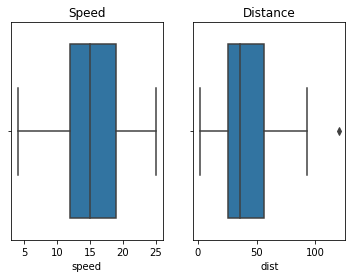

In [ ]:
# 극단값이 있을 경우, 회귀 분석의 결과에 왜곡될 수 있다. 
# 상자 그림을 그려서 데이터 상의 극단값이 있는지 확인해보면 된다. 

import matplotlib.pyplot as plt

# 1 x 2 형태로 2개의 그래프 그림
fig, (ax1, ax2) = plt.subplots(1, 2)
# speed 의 상자 그림을 첫번재로, 두번재는 dist 를 그린다, 방향은 수직
sns.boxplot( x='speed', data = df, ax = ax1, orient = 'Vertical',)
ax1.set_title('Speed')

sns.boxplot(x= 'dist', data = df, ax = ax2, orient = 'Vertical')
ax2.set_title('Distance')

# 결과를 살펴보니, dist 변수의 경우 끝에 극단점이 존재한다

Text(0.5, 1.0, 'Distance')

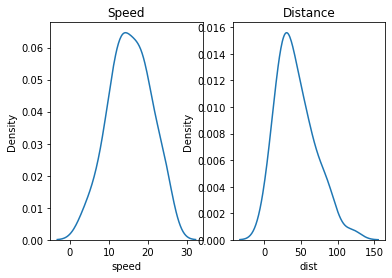

In [ ]:
# 선형회귀 분석은 독립변수와 종속변수가 정규분포를 이루때 잘 작동한다
# density plot 을 그려서 정규분포의 형태인지 확인

fig, (ax1, ax2) = plt.subplots(1,2)
sns.kdeplot(df['speed'], ax = ax1)
ax1.set_title('Speed')

sns.kdeplot(df['dist'], ax = ax2)
ax2.set_title('Distance')

# 대체로 중심부에 데이터가 몰려있고, 좌우로 갈 수록 줄어드는 정규분포와 비슷한 형태
# dist 의 경우, 조금 더 위로 치우친 값이 있긴 있으며, 오른쪽으로 살짝 늘어진 모습을 보임
# 데이터가 치우친 수준을 확인하기 위해 skewness, 왜도를 구해본다


In [ ]:
import scipy.stats 
speed_skew = scipy.stats.skew(df['speed'])
dist_skew = scipy.stats.skew(df['dist'])

print(speed_skew, dist_skew)

# speed 의 경우, 왜도가 -0.11 인데 -쪽으로 약간 치우쳤다는 의미
# dist 의 경우 왜도가 0.78인데 +쪽에 있으며, 1에 가까운 값임

-0.11395477012828319 0.7824835173114966


## 회귀분석

< 체크리스트>
- 회귀분석 평가
- statsmodel을 활용한 회귀 통계 분석
- 잔차의 정규성/독립성/등분산성 확인
- 변수선택법

In [ ]:
# 회귀분석 실시
from statsmodels.formula.api import ols
res = ols('dist ~ speed', data = df).fit()

In [ ]:
res.summary() # 결과물을 해당 코드로 확인할 수 있음


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.49e-12
Time:                        14:46:41   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 오른쪽의 R-squared ~ BIC 까지 모형 적합도를 보여줌
# 모형 적합도는 모형이 데이터에 잘 맞는 정도를 보여주는 지표

R-squared: 모형 적합도, dist 의 분산을 speed 가 65% 정도 설명한다
Adj. R-squared:	독립변수가 여러 개인 다중회귀분석에서 사용, 독립변수의 개수와 표본의 크기를 고려하여 R-squared 보정, 서로 다른 모형을 비교할 때는 이 지표가 높은 쪽을 선택
F-statistic: 회귀모형에 대한 (통계적) 유의미성 검증 결과, 
Prob (F-statistic):	통계적 유의미함을 보기 위한 수치 (p < 0.050), 
    p값이 0.05보다 작은 이번 경우, 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형
Log-Likelihood:	로그 우도, 종속변수가 정규분포라고 가정하였을 떄의 우도
    로그 우도도 R제곱과 마찬가지로 독립변수가 많아지면 증가
AIC, BIC: 로그우도를 독립변수의 수로 보정한 값, 작을 수록 좋음

SyntaxError: ignored

In [ ]:
# 회귀 계수 coefficients 
# 데이터로부터 얻은 계수의 추정치

	            coef    P>|t|	
Intercept	-17.5791	0.012	
speed	      3.9324	0.000	

절편 intercept의 추정치는 -17.5791로, speed 가 0일때 dist 의 값
speed 의 계수 추정치는 3.9324로, speed 가 1 증가할 때마다 dist 가 3.9324증가

이를 수식으로 정리하자면
dist = -17.5791 + 3.9324 x speed 

추정치의 표 중간의 p(>|t|)는 모집단에서 계수가 0일때, 
현재와 같은 표본에서 이러한 계수가 추정될 확률인 p값을 나타냄
이 확률이 매우 작다는 것은, 모집단에서 speed 의 계수가 정확히 3.9324는 아니더라도
현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미함
보통 5% 와 같은 유의수준을 정하여 p값이 그보다 작으면 (p < 0.005) 통계적으로 유의미하다고 함
 
즉, speed 가 증가할 때 기대되는 dist 의 변화는 유의수준 5% 에서 통계적으로 유의미

In [ ]:
# 결과보고
논문 등에서 회귀분석의 결과는 다음 순서대로 보고한다

1. 모형적합도
dist에 대하여 speed 로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다
F(1,48) = 89.57, p < 0.05

2. 독립변수
speed 회귀계수는 3.9324로 dist에 대하여 유의미한 예측변인인 것으로 나타났다
t(48) = 9.464 , p < 0.05

### 잔차 분석

 1. 모형의 선형성
 2. 잔차의 정규성
 3. 잔차의 등분산성
 4. 잔차의 독립성


In [ ]:
# 1. 모형의 선형성
## 예측값과 잔차의 비교 fitted - residual 비교
## 모든 예측값에서 잔차가 비슷하게 있어야 함 (가운데 점선)
## 빨간 실선은 잔차의 추세를 나타냄
## 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fitted = res.predict(df) 
residual = df['dist'] - fitted 

In [ ]:
sns.regplot(fitted, residual, lowess = True, line_kws = {'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color = 'grey')

In [ ]:
# 2. 잔차의 정규성
## 잔차가 정규분포를 따른다는 가정
## Q-Q플롯으로 확인할 수 있음
## 잔차가 정규분포를 띄면 Q-Q플롯에서 점들이 점선을 따라 배치되어있어야 함


In [ ]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

In [ ]:
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color = 'grey')

In [ ]:
# 잔차의 정규성은 샤피로 검정으로 확인할 수 있음
# 2번째 값이 p값이며, p값이 0.02이므로 유의수준 5%에서 잔차의 정규성이 위반되었다고 판단
scipy.stats.shapiro(residual)

In [ ]:
#3. 잔차의 등분산성
## 회귀모형을 통해 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
## 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
## 빨간색 실선이 수평선을 그리는 것이 이상적

In [ ]:
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess =True, line_kws = {'color':'red'})

In [ ]:
# 3-1. 극단값
## cook's distance 는 극단값을 나타내는 지표
## 48번, 22번, 38번 자료가 특히 예측에서 많이 벗어남을 알 수 있다


In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
cd, _ = OLSInfluence(res).cooks_distance

In [ ]:
cd.sort_values(ascending = False).head() 
# sorting 한 후 asending 을 통해 보면, 극단값이 크게 높은 것을 알 수 있음

In [ ]:
# 4. 잔차의 독립성
## 회귀분석에서 잔차는 정규성, 등분산성, 그리고 독립성을 가지는 것으로 가정
## 자료 수집 과정에서 무작위 표집 random sampling을 하였다면, 잔차의 독립성은 만족함
## 시계열 자료나 종단 연구 자료처럼, 연구 설계 자체가 독립성을 담보할 수 없는 경우, 더빗-왓슨검정 실시

In [ ]:
# 잔차 분석 결과를 바탕으로 아래와 같이 대응이 가능하다
## 1. 극단값을 제거한다
## 2. 독립변수를 추가한다
## 3. 종속변수를 수학적으로 변환한다

## 위의 예시에서 cd, cook distance 를 통해 보았을 떄, 48번 자료가 극단값으로 보임
## 이 떄문에 잔차의 정규성이 위배되는 것으로 추측
## 48번 자료를 제거하고 다시 분석을 시도할 수 있다

### 변수 선택법 
1. 전진선택법 
2. 후진소거법
3. 단계적선택법

([참고링크](https://zephyrus1111.tistory.com/65))

In [ ]:
# 전처리 후 변수 선택법 진행

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
 
df = pd.read_csv('/content/drive/MyDrive/ADP/surgical_unit.csv')

In [ ]:
# 1. 전진 선택법 :  기존 모형에 가장 설명력이 좋은 변수를 하나씩 추가하는 방법
## 가장 설명력이 좋은 변수라 하더라도, '변수를 추가할지 말지' 의 유의수준을 만족해야 선택
## 유의수준을 만족하지 못하면 선택이 되지 않고 종료

# 1단계 : 모형에 적합시키지 않은 변수를 기존 모형에 추가하여 적합
# 2단계 : 변수x 에 대한 회귀계수b_k 를 구하고, b_k 에 대한 통계량계산
#       : t 통계량에 대응하는 p value 구함
#       : 이 작업을 x에 있는 모든 변수에 대해 수행
# 3단계 : 최소 p value 값과 미리 정해둔 유의수준 a 와 비교
#       : 최소 p value 가 a 보다 적으면, 최소 p value 에 해당하는 변수를 s 에 포함시키고 1~2단계 수행

In [ ]:
# 전진선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
 
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
selected_variables # 전진 선택법에서 최종 변수

['Liver_Test',
 'Alc_Heavy',
 'Enzyme_Test',
 'Prognostic_Index',
 'Blood_Clotting_Score']

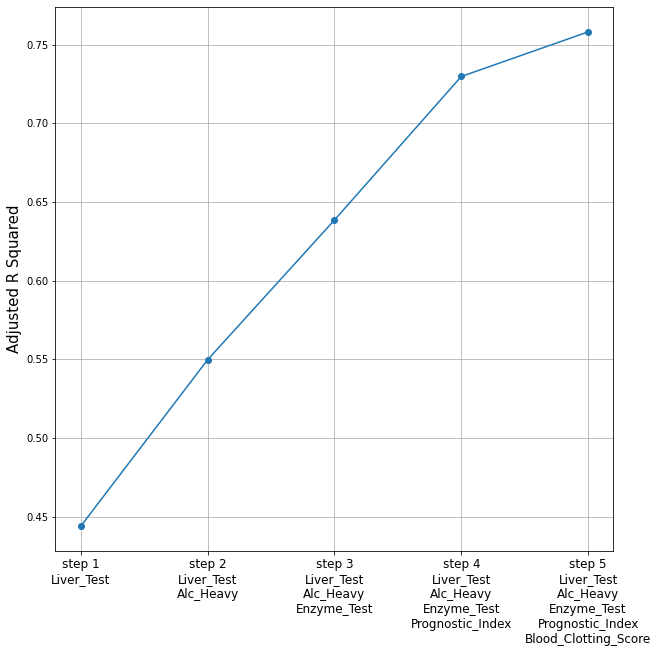

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()
# 전진선택법을 적용한 결과, step5에서 완료

In [ ]:
# 2. 후진 소거법 : 모든 변수가 포함된 모형에서 설명력이 가장 적은 변수를 제거
## 1단계 : 현재 모형에 포함된 변수를 이용하여 선형 모형을 적합
## 2단계 : 추정된(절편항을 제외한) 회귀 계수에 대하여 가장 큰 p-value 값ㄱ을 구함
## 3단계 : 만약 p value 에서 최대값이 사전에 정의한 유의수준 a보다 크다면 최대 p-value 에 대응하는 변수를 기존 모형에서 제외
##       : 그렇지 않으면 종료

In [ ]:
## 후진 소거법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
 
y = df['Survival_Time'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables # 후진 소거법에서 최종 변수

['Blood_Clotting_Score', 'Prognostic_Index', 'Enzyme_Test', 'Alc_Heavy']

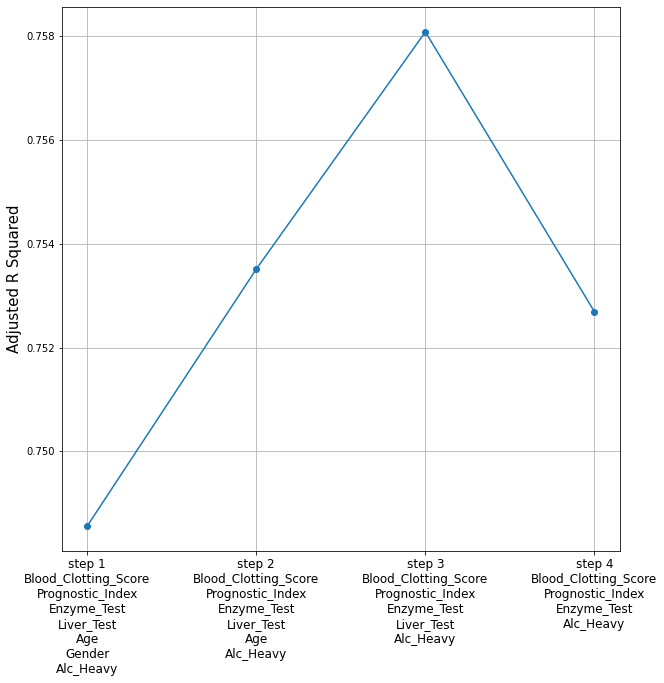

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()
# 후진소거법을 이용하여 최종 선택된 변수는 step3 상태

In [ ]:
# 단계별 선택법 : 전진선택법에서 후진 소거법을 추가한 방법
## 1~2단계 : 전진선택법과 동일
## 3단계 : 최소 p-value값과 미리 정해둔 유의수준 a와 비교. 
##       : 최소 p value < a 이면 최소 p value 에 해당하는 변수를 s에 포함시키고 4단계로 넘어감
## 4단계 : 추가된 변수를 포함하여 현재 S에 있는 모든 변수를 이용하여 선형 모형을 적합
##       : 추정된 회귀 변수( 절편항 제외) 에 대하여 가장 큰 p value 값을 구함
## 5단계 : 최대 p-value 값이 사전 정의된 유의수준보다 크거나 같으면 해당 변수를 제외하고 1단계로 넘어감

In [ ]:
## 전진 단계별 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
 
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


In [ ]:
selected_variables # 단계별 선택법에서 최종 변수

['Alc_Heavy', 'Enzyme_Test', 'Prognostic_Index', 'Blood_Clotting_Score']

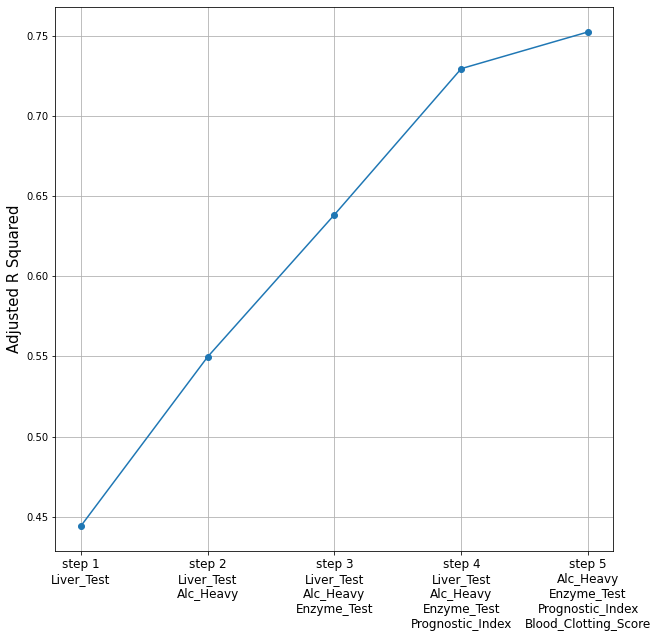

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 2. 분류 분석
[참고 링크](https://datascienceschool.net/03%20machine%20learning/09.03%20%EB%B6%84%EB%A5%98%EB%AA%A8%ED%98%95.html)

<체크리스트>

- 각종 분류기
- 앙상블 방법
- 분류분석 평가

#### 1) 각종 분류기 

- 종류


#### 2) 앙상블 방법
- 


#### 3) 분류분석 평가

## 3. 기타 분석 3가지

< 체크리스트>
- 교차분석
- 분산분석
- 상관분석

### 교차 분석
[참고링크](https://jae-eun-ai.tistory.com/51)
- 교차 분석은 두 범주변인 간 관계가 상호독립 관계인지 상호 연관성을 맺고 있는지를 검증하는 방법
- 적합도 검정, 독립성 검정, 동일성 검정에 사용
- 카이제곱 검정 통계량을 이용
- 카이제곱 교차분석에서는 '관찰빈도(true)' 와 '기대빈도(pred)' 간 차이가 얼마나 있는지 카이제곱 분포를 참조해 통계적으로 검증

#### 1) 적합도 검정
- k개의 범주 (혹은 계급)을 가지는 한개의 요인에 대하여 이론적 분포를 따르고 있는지를 검정
- 관측값들이 어떤 이론적 분포를 따르고 있는지 알아볼 수 있음
- 모집단 분포에 대한 가정이 옳게 됐는지 관측 자료와 비교하여 검정
- 귀무가설 : 실제 분포와 이론적 분포간 차이 없다 (분포 일치)
- 대립가설 : 실제 분포와 이론적 분포간 차이 있다(두 분포 일치하지 않음)

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

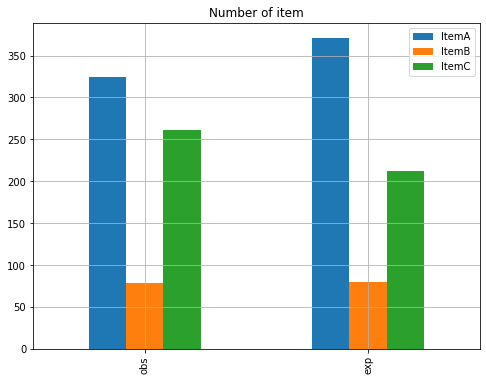

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 및 기본 처리
xo, xe = [324,78,261], [371,80,212]
xc = pd.DataFrame([xo,xe], columns=['ItemA','ItemB','ItemC'], index=['obs','exp'])
xc.plot(kind='bar', title='Number of item', figsize=(8,6))
plt.grid()

# 1. 일원 카이제곱검정 수행

# 제품 A,B,C의 보유대수를 조사하니 324대, 78대, 261대 -> 계:663
# 제품의 판매량 비율은 A56%, B12%, C32% -> 기대빈도는 663 * 0.56 ...
# 이 자료로 다음같은 관찰빈도와 기대빈도를 만들 수 있음
# 귀무가설 :  관찰빈도는 기대빈도와 같다
# 대립가설 :  관찰빈도와 기대빈도는 다르다

from scipy.stats import chisquare

result = chisquare(xo, f_exp=xe)
result

# 결과 설명
# p-value가 유의수준 0.05보다 아주 작은 값이므로 귀무가설을 기각하고 대립가설을 지지한다. 즉, 연구가설이 지지된다.

In [ ]:
# 데이터 생성 및 기본 처리
data = pd.DataFrame({'Left':[18], 'Right':[218]})
data
xo = [18,218]
xe = [47.2,188.8]

# 2. 일원 카이제곱검정 수행

# 귀무가설 : 전체응답자 중 왼손잡이는 20%, 오른손잡이는 80%이다
# 대립가설 : 전체응답자 중 왼손잡이의 비율은 20%, 오른손잡이의 비율이 80%라고 할 수 없다.

from scipy.stats import chisquare

result = chisquare(xo , f_exp=xe)
result

# 결과 설명
# p-value가 유의수준 0.05보다 작으므로 전체응답자 중 왼손잡이는 20%, 오른손잡이는 80%라는 귀무가설을 기각한다.

Power_divergenceResult(statistic=22.58050847457627, pvalue=2.0151876969887844e-06)

#### 2) 독립성 검정

- 모집단이 두 개의 변수 A,B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지를 검정하는 것을 의미
- 모집단을 범주화하는 기준이 되는 두 변수 A,B가 서로 독립적으로 관측값에 영향을 미치는지의 여부를 검정하는 것
- 귀무가설 : 두 변수 사이에는 연관이 없다. (독립이다.)
- 대립가설 : 두 변수 사이에는 연관이 있다. (종속이다.)


In [ ]:
# 데이터 생성 및 기본 처리
xf, xm = [269, 83, 215], [155, 57, 181]
x = pd.DataFrame([xf, xm], columns=['Item 1', 'Item 2', 'Item 3'], index=['Female', 'Male'])

# 1. 이원카이제곱검정

# 귀무가설 : 남녀 차이는 관측값에 영향을 미치지 않는다(독립이다) (질문, 이렇게 가설세우는게 맞나? 헷갈림)
# 대립가설 : 남녀 차이는 관측값에 영향을 미친다(종속이다)
# 제품1 ~3까지 여성과 남성의 판매량 차이에 대해 카이제곱검정

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency([xf,xm])

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

# 결과 설명
# 자유도는 (3-1) * (2-1) = 2이고, p-value는 유의수준 0.05보다 작은 값으로 
# 2개 그룹간에 차이가 있다고 판단할 수 있음, 
# 남녀 차이는 관측값에 영향을 미친다, 귀무가설기각, 대립가설 선택

Test Statistic: 7.094264414804222
p-value: 0.028807134195296135
Degree of Freedom: 2
[[250.425   82.6875 233.8875]
 [173.575   57.3125 162.1125]]


In [ ]:
# 데이터 생성 및 기본 처리
data = pd.DataFrame([[156,14,2,4],[124,20,5,4],[77,11,7,13],[82,36,15,7],[53,11,1,57]],\
                   columns=['wife','alternating','husband','jointly'], index=['landry','main_mean','dinner','breakfast','tidying'])
# 2. 이원카이제곱검정

# 귀무가설 : 집안일에 걸리는 시간에는 가정일 하는 사람과 연관성이 없다 (독립이다) (질문, 위와 동일한 부분)
# 대립가설 : 집안일에 걸리는 시간에는 가정일 하는 사람과 연관성이 있다 (종속이다)
# 와이프혼자, 남편혼자, 가정부, 같이 할때 각 집안일에 걸리는 시간 차이에 대해 카이제곱검정

from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(data)

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

# 결과 설명
# 자유도는 (4-1) * (5-1) = 12이고, p-value는 유의수준 0.05보다 작은 값으로 
# 4개 그룹간에 차이가 있다고 판단할 수 있음
# 집안일 시간 별로 와이프, 남편, 가정부, 같이할때의 차이 있다
# 귀무가설 기각, 대립가설 선택

Test Statistic: 222.77883846736816
p-value: 0.028807134195296135
Degree of Freedom: 12
[[123.87982833  23.16452074   7.55364807  21.40200286]
 [107.69098712  20.13733906   6.56652361  18.60515021]
 [ 76.01716738  14.21459227   4.63519313  13.13304721]
 [ 98.54077253  18.42632332   6.00858369  17.02432046]
 [ 85.87124464  16.05722461   5.2360515   14.83547926]]


#### 3) 동질성 검정
- 모집단이 임의의 변수에 따라 R개의 속성으로 범주화되었을 때, R개의 부분 모집단에서 추출한 각 표본인 C개의 범주화된 집단의 분포는 서로 동일한지 아닌지를 검정하는 것을 의미
- 귀무가설 : p(1j) = p(2j) = p(3j).. = p(nj) (n=1,2,...,r)
-  대립가설 : p(nj)중 다른 값이 하나이상 존재한다.
-  계산법과 검정법은 모두 **2) 독립성** 검정과 같은 방법으로 진행

### 분산 분석

#### 1) 일원배치 분산분석 one-way ANOVA

- 분산분석은 두 개이상의 집단에서 , 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살펴보는 데이터 분석방법 : 여러 그룹간의 평균의 차이가 통계적으로 유의미한지를 판단
- 일원배치 분산분석은 반응값 target 에 대해 하나의 범주형 변수의 영향을 알아보기 위한 방법 : 1개의 변수를 바꾸면 target 이 얼마나 바뀌는가? (질문, 이 값은 회귀계수를 보면 되는 것 같은데, 그 차이가 있을까? )
- F 검정 통계량을 이용
- 각 집단의 측정치는 서로 독립적이며 정규분포를 따른 (정규성 가정) 
- 각 집단의 측정치 분산은 같다 (등분산 가정)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


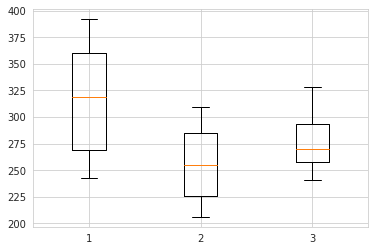

In [ ]:
# 예시1
# 데이터셋 생성 및 처리
# 22명의 심장 수술을 받은 환자를 3가지 그룹으로 나누고 적혈구의 엽산 수치를 24시간 이후에 측정
# 귀무가설 : 3가지 그룹의 평균값은 모두 같다
# 대립가설 : 3가지 그룹의 평균값에는 차이가 있다

import numpy as np
import urllib
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')


sns.set_style('whitegrid')
group1 = data[data[:,1]==1,0]  
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

plot_data = [group1, group2, group3]
plt.boxplot(plot_data)
plt.show()

# boxplot에서 보면, 평균값의 차이가 의미있는지 없는지 판단이 어렵다. 
# 분산이 커서 그런것인지 확인하기 애매하에, 분산 분석을 통해 통계적 유의성을 알아본다

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data, columns=['value','treatment'])
print(df.head(3))

model = ols('value ~ C(treatment)', df).fit()
print(anova_lm(model))

# 결과
# C treatment 의 경우 pr(>F) 값이 0.05 보다 작은 값
# 귀무가설 기각, 대립가설 선택
# 저 C라는 treatment 의 평균값의 차이가 실제로 의미가 있어, 3개의 집단을 구분하는데 유의함 (질문, 이렇게 해석해도 되는가?) 

   value  treatment
0  243.0        1.0
1  251.0        1.0
2  275.0        1.0
                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


In [ ]:
# 예시2
# 데이터셋 생성 및 처리
# iris데이터를 이용해 종별로 꽃받침의 폭(sepal.width)의 평균이 같은지 혹은 차이가 있는지를 확인
# 귀무가설 : 세가지 종에 대해 sepal.width평균은 모두 같다.
# 대립가설 : 적어도 하나의 종에 대한 sepal.width의 평균값에는 차이가 있다.

from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']


In [ ]:

# 확인
# step 1 일원 분산분석 가정 확인
# 독립성 : 자료 수집이  random sampling 되어있기 때문에 만족
# 정규성 : 집단 수준별로 실시,, 이때 shapiro 값을 사용한다 

from  scipy.stats import shapiro
print(shapiro(data.sepal_width[data.target==0]))
print(shapiro(data.sepal_width[data.target==1]))
print(shapiro(data.sepal_width[data.target==2]))
# (statistic 값, p-value 값) 의 순서로 나열
# 모든 value 가 0.05보다 크므로 정규성을 만족할 수 없지 않을까? (질문)

# 등분산성 : 레빈 검증 / 바틀렛 검증
# 레빈 검증
from scipy.stats import levene
print(levene(data.sepal_width[data.target==0],
      data.sepal_width[data.target==1],
      data.sepal_width[data.target==2]))

# 바틀렛 검증
from scipy.stats import bartlett
print(bartlett(data.sepal_width[data.target==0],
      data.sepal_width[data.target==1],
      data.sepal_width[data.target==2]))

# 두 값 모두 p-value  가 0.05 보다 큰 값을 보이면서 모분산에 유의미한 차이 없다고 판단
# 등분산성 가정이 유지됨

(0.97171950340271, 0.2715264856815338)
(0.9741330742835999, 0.33798879384994507)
(0.9673910140991211, 0.1809043288230896)
LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)
BartlettResult(statistic=2.0910752014391774, pvalue=0.35150280041581317)


In [ ]:
# step2 일원 분산분석 수행
model = ols('sepal_width ~ C(target)', data).fit()
anova_lm(model)

# 결과 해석
## pr(>F) p-value 이 값이 유의수준 0.05하에서 귀무가설을 기각
# 세가지 종에 따른 꽃받침 폭이 동일하지 않다고 결론
# 종별 꽃받침의 폭 평균값들 중 적어도 어느 하나의 종은 통계적으로 유의한 차이가 있다 
# SSA 의 자유도는 2 (집단수 3 - 1 = 2) SST 자유도는 147 (관측값의 수 - 집단의 수 150-3 = 147)

,df,sum_sq,mean_sq,F,PR(>F)
C(target),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


In [ ]:
# step 3 사후분석

from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data.sepal_width, data.target)

# 봉페로니 교정
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
print(result[0])

# 투키의 HSD - Tuckey's Honestly Significant Difference 
# = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['sepal_width'], data['target'], alpha=0.05)
hsd.summary()

# 결과
## 분산분석의 결과, 귀무가설 기각 (적어도 한 집단 내 평균 차이 존재, 통계쩍으로 증명)
## 어떤 집단들에 대해서 평균 차이가 존재하느지 알아보기 위해 실시하는 분석

## 조합 가능한 모든 쌍에 대해 비교를 하므로 과잉 검증으로 인한 FWER 증가 (질문, 또는 검색해보아야 할 내용, 왜 이 방법을 하고 이를 통해 무엇을 보고자 하는가)
## 널리쓰이는 봉페로니 교정, turkey 의 HSD 사용 (검색, 해당 값의 해석)

# pval = p-value 모든 종들에 대해서 꽃받침 폭의 평균값은 각각 통계적으로 유의한 차이를 보임
# 종 0과 종 1의 meandiff 가 음수 : 꽃받침의 폭은 종이 0일 때 보다 1일 때 통계적으로 유의한 큰 값을 가진다고 해석 가능

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     0      1   9.455    0.0       0.0   True
     0      2  6.4503    0.0       0.0   True
     1      2 -3.2058 0.0018    0.0055   True
---------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.658,0.001,-0.8189,-0.4971,True
0,2,-0.454,0.001,-0.6149,-0.2931,True
1,2,0.204,0.0088,0.0431,0.3649,True


#### 2) 이원배치 분산분석 two-way ANOVA
- 독립변인의 수가 2개 이상일 떄 집단 간 차이가 유의한지를 검증하는데 사용
- 상호작용효과 interaction effect, 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지 확인하기 위해 사용

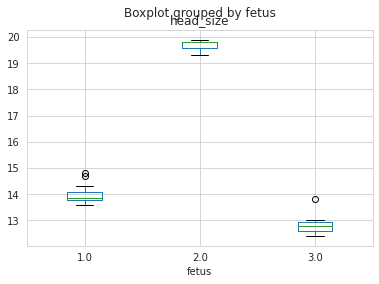

In [ ]:
# 예시 
## 태아의 머리 둘레 측정 데이터, 4명의 관측자가 3명의 태아 대상으로 측정
# 귀무가설 : 초음파로 태아의 머리 둘레 측정시 관측자와 상호작용이 없다 , 관측자에 관계없이 동일하다 (질문, 이 가정이 맞나?)
# 귀무가설 : 초음파로 태아의 머리 둘레 측정시 관측자와 상호작용이 존재한다 , 관측자에 따라 다른 값을 보인다 (질문, 이 가정이 맞나?)

# 데이터 셋팅 및 처리
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt

inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

data = pd.DataFrame(data, columns=['head_size','fetus','observer'])
data.boxplot(column='head_size', by='fetus')
plt.show()

# boxplot 을 보면 태아 3명의 머리둘레는 차이가 있어보이나, 관측자와 상호작용이 있는지 모름
# 분석을 통해 확인 필요
 

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'head_size ~ C(fetus)+C(observer)+C(fetus):C(observer)'
lm = ols(formula, data).fit()
print(anova_lm(lm))

# p-value 가 0.05이상, 귀무가설을 기각할 수 없음
# 관측자와 태아 머리둘레 값에는 연관성이 없다
# 측정하는 사람이 달라도 머리 둘레값은 일정하다고 해석 가능

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


### 상관 분석
[참고 자료](https://ordo.tistory.com/100)

- 둘 또는 그 이상의 변수들이 서로 관련성을 가지고 변화할 때, 그 관계를 분석해야 하는 데, 가장 잘 알려진 방법 중 하나가 '상관분석' 그리고 '회귀분석' 

- 각각 두 변수 간의 선형적 관계를 correlation 상관이랄고 하며, 이러한 관계에 대한 분석을 상관분석 correlation analysis라고 함

- 당뇨와 그에 영향을 미치는 변수들 간의 관계를 분석

#### 1) 산점도
- 직교 좌표계를 이용해 두 개 변수간의 관계를 나타내는 방법

데이터셋 크기:  (442, 10)


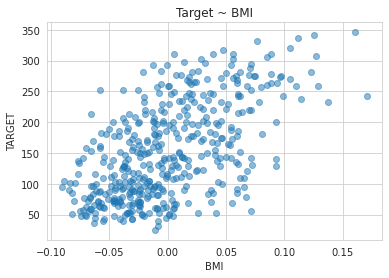

In [ ]:
# 데이터셋 구성 및 처리

import pandas as pd
import numpy as numpy
from sklearn import datasets 

data = datasets.load_diabetes()
df = pd.DataFrame(data['data'], index = data['target'], columns = data['feature_names'])
print('데이터셋 크기: ' , df.shape)

# target 이 당뇨병의 수치, 나머지 feature names 가 변수

X = df.bmi.values
y = df.index.values  

import matplotlib.pyplot as plt 
plt.scatter(X, y, alpha = 0.5) 
plt.title('Target ~ BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show()

#### 2) 공분산 covariance 및 상관계수 

correlation coefficient 
-  산점도를 이용하면 두 변수간의 직선적인 관계를 대략적으로 파악 가능하나, 두 변수 사이의 관계를 수치로 표현하지 않음
-  두 변수간의 관계를 수치로표현하기 위해 공분산과 상관계수를 활용

- 공분산 : 2개의 확률 변수의 상관정도를 나타내는 값
    -  만약 2개 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하면 공분산의 값은 양수
    - 만약 2개 변수 중 하나의 값이 상승하는 경향을 보이나, 다른 값이 하락하면 공분산의 값은 음수


In [ ]:
cov1 = cov = (np.sum(X * y) - len(X) * np.mean(X) * np.mean(y))/ len(X)
# 또는

cov2 = np.cov(X, y)[0, 1]
print(cov1, cov2)

# 두 방법 모두 비슷한 양수 발생
# 공분산의 경우, 상승/하강은 알 수 있으나 절대적 정도를 파악하기 한계 존재
# 어느정도의 양의 상관관계인지 파악이 어려움
# 공분산을 표준화 시킨 상관계수를 사용

2.1480435755297007 2.1529144226397467


In [ ]:
# 각 변수의 표준편차를 분모로 나누어주면 상관계수 계산 가능
corr_cov1 = cov1 / (np.std(X) * np.std(y))
corr_cov2 = np.corrcoef(X, y)[0,1]

print(corr_cov1, corr_cov2)
# 0 ~ 0.3 약한 양의 선형, 0.3 ~ 0.7 뚜렷한 양의 선형 , 0.7~ 1 강한 양의 선형
# 위 target 과 BMI 는 0.6에 가까운 수준으로 뚜렷한 양의 선형관계를 이루고 있음
# 상관관계는 outlier 에 민감하게 반응하기 때문에, 진행 전 전처리 필수

0.5864501344746884 0.5864501344746891


#### 3) 상관계수의 검정

- 상관계수값 자체가 유의미한지 검정 필요
- p-value 를 통해 확인 가능
- scipy.stasts.personr() 사용하여 확인

In [ ]:
import scipy.stats as stats

stats.pearsonr(X,y)

# 결과
## (통계값, p-value) 의 값인데, 뒤의 p-value 값이 0.05보다 작음
# 귀무가설인 '상관관계가 없다' 를 기각하고 
# 대립가설인 '상관관계가 잆다' 라고 판정

(0.5864501344746887, 3.4660064451654114e-42)

In [ ]:
# 나머지 변수들과의 상관계수도 아래와 같이 확인이 가능

for item in ['age','sex','bmi','bp']:
    print(item)
    X = df[item].values 
    print('Covariance: {:.2f}'.format(np.cov(X,y)[0,1]))
    print('Correlation: {:.2f}'.format(stats.pearsonr(X,y)[0]))
    print('P-value: {:.4f}'.format(stats.pearsonr(X,y)[1]))
    print('\n')

# 결과
## 당뇨병 수치 target 과 가장 관련성이 높은 것은 0.59의 상관계수를 보이는 bmi
## 가장 낮은 것은 0.04인 sex, 뿐 아니라, age도 관련성이 없다고 이야기 할 수 있음

age
Covariance: 0.69
Correlation: 0.19
P-value: 0.0001


sex
Covariance: 0.16
Correlation: 0.04
P-value: 0.3664


bmi
Covariance: 2.15
Correlation: 0.59
P-value: 0.0000


bp
Covariance: 1.62
Correlation: 0.44
P-value: 0.0000




## 5. 연관분석
- 연관규칙 분석 association rule analysis ARA 은 항목들 관계를 if-then 형식으로 찾아나가는 분석 방법
- 일종의 규칙 학습 학습 방법
- 마케팅에서 고객들의 상품 구매 데이터를 이용하여 품목 간의 연관성을 알아보는, 장바구니 분석 진행
- item간 흥미로운 관계를 탐색할 수 있다는 장점

(예시) 

삼겹살 - 상추 동시 구매하는 사람들이 많다는 것을 발견할 경우, 해당 내용을 기반으로 마케팅 전략을 수립할 수 있음 (1) 품목간 연관성 파악 (2) 효율적 상품 진열 선정


### 분석방법
2.1 연관규칙 분석 측도
- 거래내역이 존재한다 -> 구매행렬을 생성 
#### 1. 신뢰도 confidence : x를 포함하는 거래 내역 중, y가 포함된 비율
P(Y|X) = P(X n Y) / P(X) 

#### 2. 지지도 support 
-  P(X n Y) : 같이 구매한 비율, 실제로 동시에 포함하는 비율

#### 3. 향상도 lift 
- 신뢰도를 계싼했더니 0.9 가 나왔다. 그러나, y 가 발생할 확률 자체가 0.9 였다
그렇게 되면, p(Y|X) = P(Y) 가 되고, X, Y 는 독립이 되어 X, Y 관계 설명 x 
- 주어진 뀨칙이 정말 의미가 있는지 알아보기 위함
P(Y|X) /p(Y) 

- 향상도 값이 1이면 X, Y 는 아무런 관계까 없다. 
- 1보다 크면 X 가 Y 발생할 확률을 X 고려하지 않았을 경우보다 증가한다는 것
- 1보다 작으면 X 가 Y 발생할 확률을 X 고려하지 않았을 경우보다 감소, 일종의 음의 상관관계

#### 4. 레버리지 leverage 
- 향상도는 X 와 Y 독립여부를 판단하기 위해 P(Y|X) / p(Y) 를 이용,
- 레버리지는 P(X n Y) - P(X)p(Y)  계산
- 레버리지가 0에 가깝다? X, y는 독립이고 상호 연관성이 없다
- 레버리지가 양수(= 향상도가 1보다 큰 경우) 
- 레버리지가 음수 (= 향상도가 1보다 작은 경우)

### 향상도와 레버리지가 같은 역할을 하는데도 왜 별도의 측도를 도입하였을까? 
- 향상도는 비율이기에, 계산의 불안정성이 있음 (분모가 0에 가까운 작은 수일떄)
- 반대로, 레버리지가 아주 작은 값이 나오더라도 향상도는 비율이기에 큰 값으로 볼 수 있음 


####5. conviction 어떤 일이 생기지 않을 것
- 규칙 X -> y 의 conviction  = P(Y 여집합) / p(Y 여집합 | X) 
- x 일때 y 여집합이 발생할 확률 중에서, y 여집합 자체의 확률
- (질문, 조건부 확률 분에 전체 확률을 보는게 어떤 의미가 있을까? ) 
-- (블로그 글) : 1보다 크다면, x 가 주어졌을 때, Y 가 발생하지 않는 경우가,  x 를 고려하지 않았을 경우보다 작다는 것, 결국 x 가 y의 발생여부를 예측하는데 유용한 품목
- 
- conviction = 1 -> X, y 는 상호 연관성이 없는 '독립'
- conviction


In [ ]:
# 참고 문서 : https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
# apriori algorithm 구성 3가지
## support 
## confidentce 
## lift 

In [ ]:
# support = B가 포함된 거래 횟수 / 전체 거래 횟수 
# confidence 신뢰도 (a -> b) = a 와 b 동시 포함된 거래 횟수 / a가 포함된 거래 횟수 
# lift 향상도 (a->b) = confidence(a->b) / support(b)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=56f6054824f5a2ca5757c6d9c6ac1baeae413fb933948426e1fe2cb8665a9cf3
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
store_data = pd.read_csv('/content/drive/MyDrive/ADP/store_data.csv')

In [ ]:
store_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# apriori library 는 리스트 형태의 데이터로 구성되어야 하고,
# 전체와 일부 데이터셋을 각각 구성할 수 있어야 한다

In [ ]:
store_data.shape

(7500, 20)

In [ ]:
len([i for i in range(0, 7501)])

7501

In [ ]:
from tqdm import tqdm
records = []
for i in tqdm(range(0, 7500)):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])

100%|██████████| 7500/7500 [04:37<00:00, 26.99it/s]


In [ ]:
len(records) # apriori에 적용 가능한 데이터셋 만들기

7500

In [ ]:
# apriori 클래스
# min_support : 최소 지지도
# min_confidence : 최소 신뢰도
# min_lift 최소 향상도
# min_length 아이템 최소 갯수

In [ ]:
# 만약 우리가 분석하기로 한 상품이 하루에 5번 이상, 일주 35회 이상이라고 해보자
# 35 / 7500 = 0.0045, 전체 transaction 중에서 일주일에 35번 이상 한 경우를 지지도
# 0.2 나 20% 를 일반적인 지지도로 삼음
# 향상도는 2

In [ ]:

association_rules = apriori(records, min_support = 0.0045,
                           min_confidence = 0.2,
                           min_lift = 3,
                           min_length = 2)

association_results = list(association_rules)

# 위와 같은 조건을 모두 만족하는 경우를 결과로 뽑아냄

In [ ]:
# 결과를 확인하기 
print(len(association_results)) 
# 위의 조건을 만족하는 경우가 48개
# 각각 한개씩 살펴보자

48


In [ ]:
association_results[0]
#items=frozenset({'light cream', 'chicken'}),
# support=0.004533333333333334,
# ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), 
# items_add=frozenset({'chicken'}), 
 
# 처음으로 보이는 light cream 과 chicken 의 경우 지지도가 0.0045
# 이 뜻은 전체 중에서 light cream 을 포함하는 모든 거래횟수를 나눈 것
# 신뢰도의 경우, 0.2905인데, 이건 치킨을 포함하는 값
# 향상도의 경우, 4.84로 확인되는데, 이는 향상도를 의미하며, light cream만 샀을때 대비하여 chicken 과 같이 구매하는 횟수의 비중을 의미함                                                                                                               #confidence=0.2905982905982906, lift=4.843304843304844)])

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])

In [ ]:
# 조금
for item in association_results:
    pair = item[0] 
    items = [ x for x in pair]
    print('rule: ' + items[0] + ' -> ' + items[1]) # 이 부분이 새로운 아이템을 한개씩 더하는 것
    print('support: ' + str(item[1])  ) # 2번째 index 값을 가져옴
    print('confidence ' + str(item[2][0][2]))
    print('lift: ' + str(item[2][0][3]))
    print("=====================================")


rule: light cream->chicken
support: 0.004533333333333334
confidence 0.2905982905982906
lift: 4.843304843304844
rule: mushroom cream sauce->escalope
support: 0.005733333333333333
confidence 0.30069930069930073
lift: 3.7903273197390845
rule: escalope->pasta
support: 0.005866666666666667
confidence 0.37288135593220345
lift: 4.700185158809287
rule: ground beef->herb & pepper
support: 0.016
confidence 0.3234501347708895
lift: 3.2915549671393096
rule: ground beef->tomato sauce
support: 0.005333333333333333
confidence 0.37735849056603776
lift: 3.840147461662528
rule: olive oil->whole wheat pasta
support: 0.008
confidence 0.2714932126696833
lift: 4.130221288078346
rule: shrimp->pasta
support: 0.005066666666666666
confidence 0.3220338983050848
lift: 4.514493901473151
rule: light cream->chicken
support: 0.004533333333333334
confidence 0.2905982905982906
lift: 4.843304843304844
rule: shrimp->chocolate
support: 0.005333333333333333
confidence 0.23255813953488372
lift: 3.260160834601174
rule: cooki

## 5. 


## 6. 표본추출과 T검정
### 1)  데이터 샘플링
- 표분추출
- 층화임의추출

### 2) T검정
- 일표본(단일표본) T-검정
    - 단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정기준값과 비교할 때 사용
    - 모집단 평균과 일부 집단의 평균 비교
    - 귀무가설 : 차이가 없음
    - 대립가설 : 차이가 있음
- 대응표본 T 검정
    - 한 집단의 두 개 변수의 점수 비교
    - 귀무가설 : 한 집단의 사전, 사후 점수 차이는 없다
    - 대립가설 : 한집단의 사전, 사후 점수 차이가 있다
- 독립표본 T 검정
    - 독립적인 두 집단의 평균 비교
    - 귀무가설 : 두 집단의 평균 차이 없음
    - 대립가설 : 두 집단의 평균 차이 있음 


In [ ]:
# 표본 추출
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris 
iris = load_iris() 

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target

### 1) 층화 임의 추출
- 모집단이 이질적인 몇개의 층으로 이루어져있을 떄, 모든 계층으로 원소를 임의로 추출하여 
- 각 계층을 고루 대표할 수 있도록 랜덤하게 추출하는 방법

In [ ]:
# 층화 임의 추출
# 모집단이 이질적인 몇개의 층으로 이루어져있을 떄, 모든 계층으로 원소를 임의로 추출하여 
# 각 계층을 고루 대표할 수 있도록 랜덤하게 추출하는 방법

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = \
train_test_split(iris.data, 
                 iris.target,
                 test_size = 0.2,
                 stratify = iris.target,
                 random_state = 1204)

In [ ]:
# t검정, 단일표본 검정 : 모집단의 평균값과, 특정 기준값 간에 차이를 보이나? 라는 궁금증에서 시작
# 귀무가설 : 차이가 없다, 평균값과 같다
# 대립가설 : 차이가 있다, 평균값과 엄연히 다르지!
## 예시
## 귀무가설 : 중학생의 점수 평균값은 3이다
## 대립가설 : 중학생의 점수 평균값은 3이 아니다

### 기본 가정사항 :
### 정규성 : 독립변수에 따른 종속변수는 정규분포를 만족해야 한다
### 정규성은 일반적으로 범주별 30개 이상의 데이터셋이 있다면, 중심극한정리에 의해 정규성이 만족된다고 이야기 한다 


In [ ]:
# 정규성 검정 - 우선 정규성을 만족하는지 부터 확인
# 정규성은 샤피로 검증을 통해 확인 가능하다 
from scipy.stats import shapiro 
mu = 25
data = [35, 40, 12, 15, 21, 14, 46, 10, 28, 48, 16, 30, 32, 48, 31, 22, 12, 39, 19, 25]

In [ ]:
shapiro(data) # 이때 pvalue 가 0.05 보다 크다
# 샤피로검정의 귀무가설 : 정규성을 만족한다 / 대립가설 : 정규성을 만족하지 않는다
# 결국, 0.18 인 pvalue 값으로 인해 귀무가설을 기각하지 못하고, 채택한다
# 다시 말해서, 해당 값은 정규성을 만족한다고 볼 수 있다
# 계속 진행해보자!

(0.9335052371025085, 0.1803210973739624)

In [ ]:
print(len(data) - 1) # 자유도

19


In [ ]:
from scipy.stats import ttest_1samp 
ttest_1samp(data, mu)
# 단일검정 시작하였을 때, p_value 0.45 로서 0.05 보다 크기 때문에 귀무가설을 기각하지 못한다
# 평균과 같다, 라는 귀무가설 그대로 가져간다

Ttest_1sampResult(statistic=0.7687155636314738, pvalue=0.4515123595472501)

### 2) 대응표본 T-검정 paired t-test 
- 하나의 샘플에서 전과 후를 비교하는 것
- 실험 이전의 집단과, 실험 이후의 집단이 동일한 집단인 경우 사용
- 한 개인이 서로 다른 두 조건에서 짝을 지어 한 쌍이 연구대상이 되는 경우의 분석방법
- 모집단은 1개다, 다이어트 전후 1명의 몸무게를 1쌍으로 두고 진행하는 경우
- 이때도 정규성을 만족해야 하는 것 

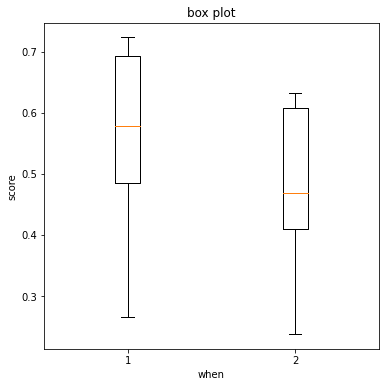

In [ ]:
x1= [.430, .266, .567, .531, .707, .716, .651, .589, .469, .723]
x2= [.415, .238, .390, .410, .605, .609, .632, .523, .411, .612]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (6, 6))
plt.grid()
plt.boxplot([x1, x2])
plt.xlabel('when')
plt.ylabel('score')
plt.title('box plot')
plt.grid()
plt.show()

In [ ]:
# 정규성 검사
from scipy.stats import shapiro 

normal1 = shapiro(x1)
normal2 = shapiro(x2) 
print(normal1, normal2)
# 두 모집단의 p-value 모두 0.05 보다 크다
# 귀무가설인 '정규성을 만족한다' 를 가설할 수 없다
# 때문에 샤피로 검정을 통해 정규성을 획득했다고 볼 수 있다

(0.9223615527153015, 0.3770734369754791) (0.8827136754989624, 0.14017775654792786)


In [ ]:
#등분산성 구하기(levene test)

from scipy.stats import levene 

levene(x1, x2)

LeveneResult(statistic=0.00031724210860253736, pvalue=0.9859853433842356)

In [ ]:
# 또 다른 등분산성 구하기
from scipy.stats import bartlett 
bartlett(x1, x2)  # 이 경우에도 pvalue 가 0.5 보다 크면서, 귀무가설을 기각할 수 없게 되었다

BartlettResult(statistic=0.10672524785997134, pvalue=0.7439036474889935)

In [ ]:
# 대응표본 t 검정
from scipy.stats import ttest_rel 

ttest_rel(x1, x2 ) 
# pvalue 값이 0.05에 미치치 않을 정도로 작은 금액, 귀무가설 기각
# 두 그룹차이는 통계적으로 유의하다 
# = >두 그룹차이는 존재하고, 통계적으로도 의미가 있다고 판단한다

Ttest_relResult(statistic=4.863812745135183, pvalue=0.0008911154578225479)

### 3) 독립표본 T검정
- 분석하고자 하는 변수가 연령, 혈압등의 연속변수 (평균과 표준편차로 요약될 수 있는 형태의 자료)
- 두 집단 간 평균의 차이를 비교

<기본 가정사항>
- 독립성 : 독립변수의 그룹군은 서로 독립적
- 정규성 : 독립변수에 따른 종속변수는 정규분포를 만족해야 함
- 등분산성 : 독립변수에 따른 종속변수 분산은 군마다 동일 (levene 의 등분산검정)

- 귀무가설 : A 집단과 B 집단의 n 이라는 통계값은 차이가 없을 것이다
- 대립가설 : A 집단과 B 집단의 n 이라는 통계값은 차이가 있을 것이다

In [ ]:
from sklearn.datasets import load_iris 
iris = load_iris() 

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target 

x1 = np.array(df.iloc[:, 0][0: 50])
x2 = np.array(df.iloc[:, 0][50:100])

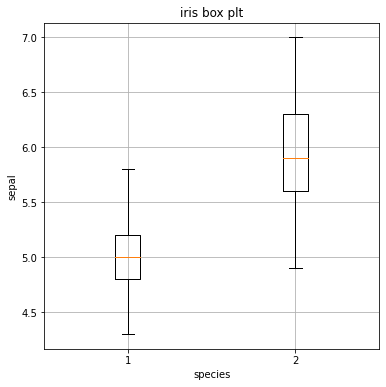

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize = (6, 6))
plt.grid() 
plt.boxplot([x1, x2])
plt.xlabel('species')
plt.ylabel('sepal')
plt.title('iris box plt')

plt.show()

In [ ]:
# 정규성 검정 
normal1 = shapiro(x1)
normal2 = shapiro(x2) 

print(normal1, normal2) # 두 값다 pvalue 가 0.05를 넘어섬
# 해당 값은 귀무가설을 기각하지 못한다
# 때문에 정규성을 가진다고 말할 수 있다

(0.9776989221572876, 0.4595281183719635) (0.9778355956077576, 0.46473264694213867)


In [ ]:
# 등분산성 검정 levene, ttest_ind, bartlett 
from scipy.stats import levene, ttest_ind, bartlett 
levene(x1, x2) #두번다 0.05보다 작으므로 귀무가설 기각 => 등분산성을 만족못함

LeveneResult(statistic=8.172720533728683, pvalue=0.005195521631017526)

In [ ]:
bartlett(x1, x2)

BartlettResult(statistic=6.891726740802407, pvalue=0.008659557933880048)

In [ ]:
# 등분산성을 만족하지 못한다면? 독립t 검정을 수행
ttest_ind(x1, x2, equal_var = False) 
# 결과, 통계량 옆 pvalue 가 0.05 보다 작기 때문에, 
# 귀무가설 기각할 수 있다
# 두 집단은 통계적으로 유의한 차이를 보인다고 말할 수 있다

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

## 7. 탐색적요인분석, 주성분분석
### 1) 탐색적 요인분석 FA
- 다수 변수들을 변수들 간의 관계를 분석하여 공통 차원들을 통해 축약
- 정보 손실을 최소화하면서 소수의 요인으로 축약
- 독립변수 / 종속변수 개념 없음

### 2) 주성분분석 PCA
### 3) 차원축소법

### 1) 탐색적 요인 분석
- 요인분석 FA 는 관찰된 변수 집합에서 영향력 있는 기본 요인 및 잠재 변수를 검색하는데 사용
- 변수 수를 줄임
- 모든 변수에서 최대 공분산을 추출
- 요인분석을 진행하면, 가격에 민감한 고객을 식별하고, 소비자 선택에 영향을 미치는 브랜드 기능을 식별 가능

#### 전제 조건
1. 등간척도, 정규분포, 관찰치가 상호 독립적,분산 동일
2. 모상관 행렬이 단위 행렬이라는 가설이 기각되어야 함 (KMO, bartleet 검정)
3. 최초 요인 추출 단계에서 얻은 고유치를 scree chart 로 표현시, 한 군데 이상 꺾이는 것
4. 변수 간 높은 상관관계가 있어야 한다 ( 질문, 다중공선성에 대한 우려같은건 안해도 되는가_)

#### 탐색적 요인 분석 방법
1. 변수간의 상관행렬로부터 공통요인을 도출
2. 도출된 공통요인을 이용해서 변수간의 상관관계를 설명
3. 요인 부하량 factor loading 은 +- 0.3 이상이면 유의

#### 탐색적 요인 분석의 목적
1. 자료의 요약 : 변수들을 몇개의 공통적 변인으로 묶음
2. 측정항목 타당성 검정 : 변인들이 동일한 요인으로 묶이는지 확인, 묶이지 않는 변수는 다른 특성을 가진다고 판단
3. 변인구조 파악 : 변수들의 상호관계를 파악
4. 불필요한 변인 제거 : 중요도나 설명력이 낮은 변수를 제거
5. 회귀분석이나 판별분석의 설명변수 선택

#### PCA(주성분분석)과의 차이점
1. pca성분은 최대 분산량을 설명하는 반면, 요인분석은 데이터의 공분산을 설명
2. pca 구성요소는 서로 완전히 직교하는 반면, 요인 분석에서 요인이 꼭 직교하는 것은 아님
3. pca 성분은 관찰된 변수의 선형조합이지만, fa에서 관찰된 변수는 관찰되지 않은 또는 요인의 선형조합
4. pca 구성요소는 해석할 수 없지만, fa에서 기본 요소는 라벨링과 해석이 가능하다
5. pca 는 일종의 차원 감소 방법이며, 요인 분석은 잠재 변수 방법
6. pca 는 관찰이지만 fa는 모델링 기술

In [ ]:
# 탐색적 요인 분석 코드
!pip install factor-analyzer

     |████████████████████████████████| 41 kB 528 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=451b9cee55460337222a2b07bb322df71bafe92905f2086f92319bad466d90a4
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ADP/bfi.csv', index_col = 0)
df.columns 

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [ ]:
df.drop(['gender','education','age'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


In [ ]:
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67547,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
67549,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [ ]:
# 요인성 평가
## 요인 분석을 수행하기 전, 요인성을 평가해야 한다
## 요인성? 
### 데이터셋에서 요인을 찾을 수 있는지를 확인하는 것
## 요인성을 찾는 방법(인수 분해성, 샘플링 적절성 찾는 방법)


#### 1. bartlett 테스트

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
chi_square_value, p_value= calculate_bartlett_sphericity(df)
chi_square_value, p_value 
# p_value 가 0이므로 탐색적 요인분석에 적합한 데이터라고 할 수 있음

(18170.966350869243, 0.0)

#### 2. Kaiser-meyer-olkin KMO 검정
- 관측된 각 변수와 전체 모델에 대한 적절성을 결정
- KMO 는 관측된 모든 변수간의 분산 비율을 추정
- bartlett 과 달리 p 값이 없기에 판단 기준이 따로 있다
- 0.6 미만의 KMO 값은 부적절, 0.8 이상이면 우수
- kmo테스트를 하려면 변수가 3개 이상이어야 함


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo 
kmo_all, kmo_model = calculate_kmo(df)
kmo_model # 0.85값이기에 우수하다고 판단, 요인성이 있는 데이터셋!

0.8485397221949221

In [ ]:
# 요인수 선택

fa = FactorAnalyzer(n_factors = 25, rotation = None)
fa.fit(df) 
# eigen 값 추출 : 추출할 요인 수를 선택할 떄 이것을 본다
## 한 요인에 대한 요인 적재 값의 제곱의 합
##요인의 설명력을 나타냄
## eigenvalue 가 크면 그 요인들이 변수들의 분산을 잘 설명한다고 봄
## 보통 eigenvalue 1 이상을 갖는 요인의 수만큼 추출

# 요인 수를 사전에 결정하여 지정
# 선행연구를 참고하거나, 연구자가 적절한 요인수를 알고 있을 떄 사용
# 설명력 또는 스크리 도표에서 꺾이는 부분으로 판단한다

ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

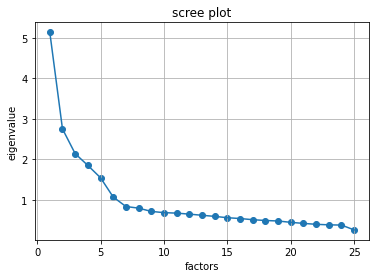

In [ ]:
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title('scree plot')
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

##### 요인분석 : 회전 

[참고자료](https://www.ibm.com/docs/ko/spss-statistics/25.0.0?topic=analysis-factor-rotation)

1. varimax : 각 요인의 로딩이 높은 변수의 수를 최소화 하는 직교 회전 방법
2. 직접 오블리민 방법 : 사각(비직교) 회전방법, 델타가 0일때 해법은 가장 기울어지는 형태, 
델타가 음수에 가까워질수록 요인의 기울기가 평평해
3. 쿼티멕스 : 각 변수를 설명하는 데 필요한 요인수를 최소화 하는 회전 방법
4. 이쿼멕스 : 요인을 단순화 하는 베리멕스 방법과 변수를 단순화 하는 쿼티 멕스 방법 조합, 요인에 읽어들인 변수의 수와 변수 설명에 사용할 요인수는 최소화 

##### 요인분석 : 요인추출

[참고자료](https://www.ibm.com/docs/ko/spss-statistics/25.0.0?topic=analysis-factor-extraction)
1. 주성분분석
2. 가중치를 부여하지 않은 최소제곱법
3. 일반화 최소제곱법
4. 최대-우도법
5. 주축 요인 추출
6. 알파 
7. 이미지 요인 추출

'분석 - 추출 - 출력' 으로 진행


In [ ]:
# 탐색적 요인분석 실시 
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax') 
# 참고자료 : https://www.ibm.com/docs/ko/spss-statistics/25.0.0?topic=analysis-factor-rotation

# 요인 추출 방법 : ml 최대 우도 방법


fa.fit(df)
efa_result = pd.DataFrame(fa.loadings_, index = df.columns)
efa_result

,0,1,2,3,4,5
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


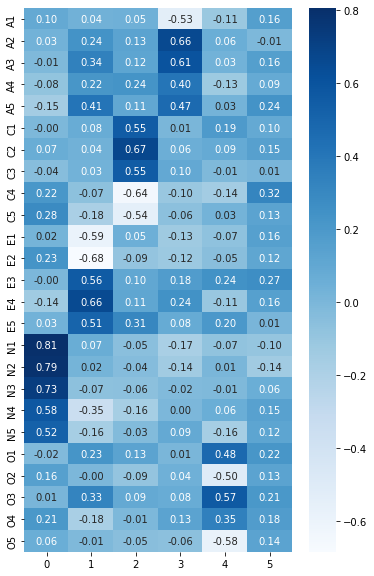

In [ ]:
import seaborn as sns
plt.figure(figsize = (6, 10))
sns.heatmap(efa_result, cmap = 'Blues', annot = True, fmt = '.2f')

< 위 그래프 해석> 
- 요인 0 은 N1, n2, n3, n4, n5 에 높은 요인 적재량을 보임
- 요인 1은 E1, E2, E3, e4, e5 에 높은 요인 적재량을 보임
- 요인 2는 c1, c2, 3, c4, c5에 대해 높은 요인 적재량을 가짐
- 요인 3은 a1, a2, a3, a4, a5 에 높은 요인 적재량을 가짐
- 요인 4는 o1, o2, o3, o4, o5 에 대해 높은 적재량을 가짐
- 요인 5는 변수에 대해 높은 요인 적재량이 없다고 해석, 따라서 위의 0~4가지만 활용

In [ ]:
# 5개 요인으로 분석
fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [ ]:
fa.get_factor_variance() 
df1 = pd.DataFrame(fa.get_factor_variance())
df1.index = ['SS loadings', 'proportaion var', 'cumulative var']
df1

,0,1,2,3,4
SS loadings,2.709633,2.473090,2.041106,1.844498,1.522153
proportaion var,0.108385,0.098924,0.081644,0.073780,0.060886
cumulative var,0.108385,0.207309,0.288953,0.362733,0.423619


##### 신뢰도 분석
- 요인 분석 전에 진행되어야 하는 것이 신뢰도 분석
- 응답자들이 얼마나 제대로 응답을 했는지 평가하는 것
- 설문 논문에서 반드시 제시되어야 함
- 실제 요인 분석시에는 '신뢰도 분석 -> 요인분석 -> 신뢰도 분석.... '으로 진


In [ ]:
# 신뢰도 계수 (크론바흐 알파계수) 확인

In [ ]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis = 0, ddof = 1)
    tscores = itemscores.sum(axis = 1)
    nitems = itemscores.shape[1] 
    
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() /  tscores.var(ddof = 1)))

In [ ]:
factors = ['A', 'C','E','N','O']
factors_items_dict = {}
for factor in factors:
    factors_items_dict[factor] = [x for x in df.columns if x[0] == factor]

factors_items_dict
# 최종적으로 사용할 요인들을 모아서 하나의 factor 로 만든다

{'A': ['A1', 'A2', 'A3', 'A4', 'A5'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5'],
 'N': ['N1', 'N2', 'N3', 'N4', 'N5'],
 'O': ['O1', 'O2', 'O3', 'O4', 'O5']}

In [ ]:
for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlpha(df[value]))
    # 각 값에 대한 신뢰도 계수를 계산하여 아래와 같이 가져온다
# 최종 결론 : N, A 의 경우 신뢰도가 높다고 할 수 있다
# 그럼 이 다음에 어떻게 해야 하는걸까? 저 2가지가 신뢰도가 높은 요인이니
# 저것들을 가지고 묶어버린 요인을 가지고 뭔가를 할 수 있다고 이야기를 할 수 있는것일까? 
# (질문, 요인분석 내 신뢰도계수를 통해 얻은 값을 가지고 연구자는 어떤 이야기를 할 수 있는것일까?)

A
0.4437533019387808
C
-0.31628341382240494
E
-0.6552429584732491
N
0.8169468842774033
O
-0.176098107937655


### 2) PCA 주성분분석
- 고차원의 데이터를 저차원의 데이터로 환원시키는 방법
- 데이터를 어떤 기준으로 바탕으로 변환을 하고, 그 변환으로 인해 주성분 추출
- 추출된 주성분을 원래 가지고 있는 데이터와 다른, 변환된 데이터
- 변수의 의미가 중요한 경우엔 PCA 를 사용하면 안됨, 
- PCA 탐색적 분석 : 변인을 탐색하여 변환을 통해 주성분을 결정
- PCA 의 본질은 차원 축소

In [ ]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names= ['sepal lenght','sepal width','petal length', 'petal width','target'])

from sklearn.preprocessing import StandardScaler 
x = df.drop(['target'], axis = 1).values 
y = df['target'].values 

x = StandardScaler().fit_transform(x) 
features = ['sepal length','sepal width','petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
# 최적의 주성분 개수 구하기
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(x) # x 변수는 4가지
PC_score = pca.transform(x)

# pca 의 eigen_vector
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [ ]:
pca.explained_variance_ 
# explained_variance 를 통해 pc 값의 설명력을 확인
# pc 값이 클수록 설명력이 높다
# 첫번째 PC값이 가장 크므로 가장 설명력이 높다

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
ratio = pca.explained_variance_ratio_
ratio
# 아래의 숫자는 설명력을 나타내주는 것
# PC1 이 72.7% , PC2 23.0%, 주성분 2개가 전체의 96%를 설명

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

,pc_ratio
PC1,0.727705
PC2,0.230305
PC3,0.036838
PC4,0.005152


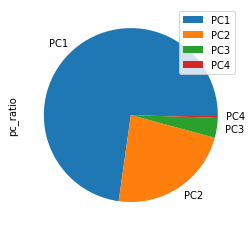

In [ ]:
# 설명력 정도 확인
df_v = pd.DataFrame(ratio, index = ['PC1','PC2','PC3','PC4'],
                    columns = ['pc_ratio'])
df_v.plot.pie(y = 'pc_ratio')
df_v

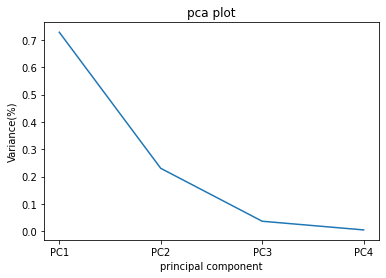

In [ ]:
# plot 그래프로도 확인하기
ax = plt.plot(['PC1','PC2','PC3','PC4'], ratio)
plt.ylabel('Variance(%)')
plt.xlabel('principal component')
plt.title('pca plot')
plt.show()

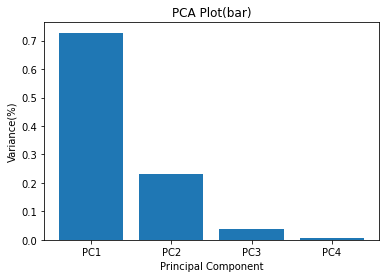

In [ ]:
ax = plt.bar(x = range(len(ratio)), height=ratio, tick_label= ['PC1','PC2','PC3','PC4'])
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot(bar)')
plt.show()

#### 최적의 주성분 개수로 분석하기

In [ ]:
# 주성분 2개로 분석 
from sklearn.decomposition import PCA 
import numpy as np
pca = PCA(n_components = 2) # 주성분의 개수 결정
pc = pca.fit_transform(x) 
pc_y = np.c_[pc, y]
principalDf = pd.DataFrame(pc_y, columns = ['pc1','pc2','diagnosis'])
principalDf

,pc1,pc2,diagnosis
0,-2.26454,0.505704,Iris-setosa
1,-2.08643,-0.655405,Iris-setosa
2,-2.36795,-0.318477,Iris-setosa
3,-2.3042,-0.575368,Iris-setosa
4,-2.38878,0.674767,Iris-setosa
...,...,...,...
145,1.87052,0.382822,Iris-virginica
146,1.55849,-0.905314,Iris-virginica
147,1.52085,0.266795,Iris-virginica
148,1.37639,1.01636,Iris-virginica


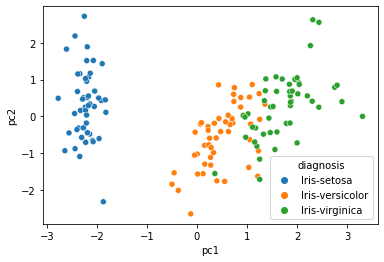

In [ ]:
import seaborn as sns
sns.scatterplot(data = principalDf, x = 'pc1',y = 'pc2', hue = 'diagnosis')

In [ ]:
# 로지스틱 분석
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
clf2 = LogisticRegression(max_iter = 1000, 
                          random_state = 0,
                          multi_class = 'multinomial')
clf2.fit(pc,y)
pred = clf2.predict(pc) 
confusion_matrix(y, pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  5, 45]])

### 3) LEE, MDS 등의 차원 축소법

#### MDS
- 저차원 공간에 데이터를 삽입하기 위한 비선형 기술
- 고차원 공간에 있는 점을 저차원 공간에 매핑하며, 해당 점 사이의 거리를 최대한 유지
- (다차원 축소 외에도 PCA , SVD 를 사용하여 추가 축소기술 사용이 가능)

- MDS 구현하는 2가지 주요 방법
    - metric MDS / Classic MDS : 가능한 쌍별 거리 / 비유사성 측정값을 유지하는 것을 목표
    - Non-metric MDS : 비유사성 메트릭의 순위만 알고 있는 경우에 적용


In [ ]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt 
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
X = np.array([[0,0,0],
              [0,0,1],
              [1,1,1],
              [0,1,0],
              [0,1,1]])
mds = MDS(random_state = 0)
X_transform = mds.fit_transform(X)
print(X_transform)
# 위의 방식은 3차원 값을 2차원 공간에 나타낸 값

[[ 0.72521687  0.52943352]
 [ 0.61640884 -0.48411805]
 [-0.9113603  -0.47905115]
 [-0.2190564   0.71505714]
 [-0.21120901 -0.28132146]]


In [ ]:
stress = mds.stress_
print(stress)

0.18216844548575456


In [ ]:
# mds 를 적용하는 또 다른 방법은 거리행렬을 구성하고 이 행렬에 직접 mds 를 적용하는 것
# 유클리드 거리, 쌍별 맨해튼 거리 등을 사용함
# 해당 거리를 계산하고, MDS 를 통해 데이터를 변환

dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state = 0)
X_transform_L1 = mds.fit_transform(dist_manhattan)

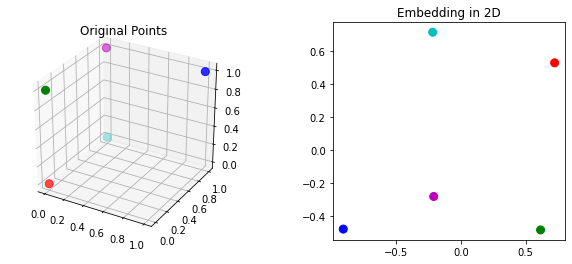

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm']
size = [64, 64, 64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

In [ ]:
# 만약 데이터가 주어지고, MDP 로 차원축소하라는 문제가 생긴다면 사용가능한 코드
# 맨하탄 거리 사용시 
dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)
X_transform_L1 = mds.fit_transform(dist_manhattan)

# 유클리드 거리 사용시
dist_euclid = euclidean_distances(X)
mds = MDS(metric = dist_euclid, dissimilarity='precomputed', random_state = 0)
X_transform_L2 = mds.fit_transform(dist_euclid)

# 차원이 dim 으로 정해질 경우
# 맨하탄 거리 사용시 
dim = 2
dist_manhattan = manhattan_distances(X)
mds = MDS(n_components = dim, dissimilarity='precomputed', random_state = 0)
X_transform_L3 = mds.fit_transform(dist_manhattan)

# 만약 stree 값을 저장해서 보고자 한다면 
mds.stress_ #로 조회한 뒤 
stress_list = []
stress_list.append(mds.stress_) #등에 넣고 저장한다

#### LLE, 로컬 선형 임베딩 Locally-linear-embedding 
- 매니폴드 학습 중 하나
- 매니폴드 : 고차원 데이터가 있을 때, 고차원 데이터를 데이터 공간에 뿌리면 샘플들을 잘 아우르는 subspace 가 있을 것이라는 가정에서 학습을 진행
    <목적 4가지>
        1. 데이터 압축
        2. 데이터 시각화
        3. 차원의 저주 피하기
        4. 유용한 특징 추출하기

<정의>
- 각 훈련 인스턴스를 가장 가까운 이웃과 연결하여 고차원 입력의 저차원 임베딩을 생성하는 비지도 학습 알고리즘

<방법>

- 각 점의 k 개의 최근접 이웃 집합을 찾음
- 해당 점을 이웃의 선형 조합으로 설명 : x(i) = w_1 * 주변 xx_1 + ...  + w_m * xx_m
    - 해당 점의 비용함수 = 평균값(x(i) - w1 * xx_1 의 합)
- 각 점의 이웃의 선형 조합으로 설명
    - 가중치가 0, m개 가장 가까운 이웃에 포함되지 않은 경우, 가중치를 정규화
    - 


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors = 4, n_components = 2)
X_transformed = lle.fit_transform(X)
# method = 'standard' 가 기본값
# neighbors_algorithm : {'auto','brute','kd_tree','ball_tree'} 셋팅

## 8. 시계열 분석

In [ ]:
# arma 모델
import pandas
import statsmodels.tsa.api as tsa
from pandas.io.data import DataReader
import pandas

data = DataReader('GOOG','yahoo')
dates = data.index

# start at a date on the index
start = dates.get_loc(pandas.datetools.parse("1-2-2013"))
end = start + 30 # "steps"

# NOTE THE .values
arma =tsa.ARMA(data['Close'].values, order =(2,2))
results= arma.fit()
results.predict(start, end)

The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.
3. Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# We can also calculate a final root mean squared error score (RMSE) for the predictions, providing a point of comparison for other ARIMA configurations.

## 9. 불균형 클래스 분류
- 언더 샘플링 : 다수 클래스 데이터에서 일부만 사용하는 경우
- 오버 샘플링 : 소수 클래스 데이터를 증가시키는 방식

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd 
from collections import Counter 
from matplotlib import pyplot 

# 필요함수 정의 
def count_and_plot(y):
    counter = Counter(y)
    for k, v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
        pyplot.bar(counter.keys(), counter.values())
        pyplot.show()
# 데이터 읽어오기
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
df = pd.read_csv(url, header=None)
data = df.values
X, y = data[:, :-1], data[:, -1]

0.8.1


### 1) 언더 샘플링
- 제일 적은 클래스의 갯수로 데이터셋이 랜덤하게 삭제 됨

Class=1, n=9 (16.667%)


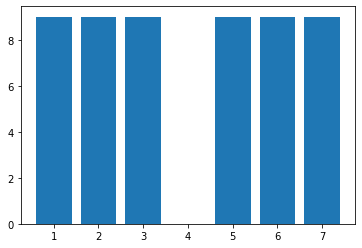

Class=2, n=9 (16.667%)


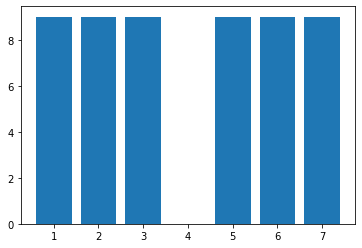

Class=3, n=9 (16.667%)


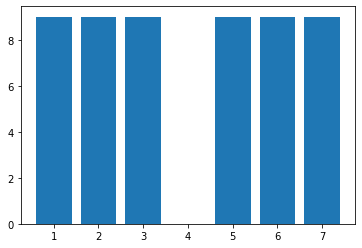

Class=5, n=9 (16.667%)


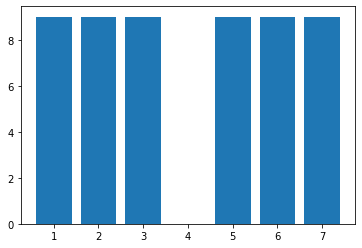

Class=6, n=9 (16.667%)


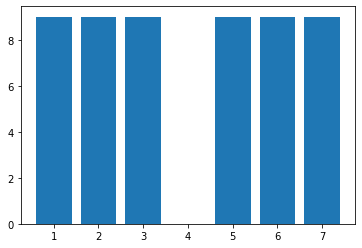

Class=7, n=9 (16.667%)


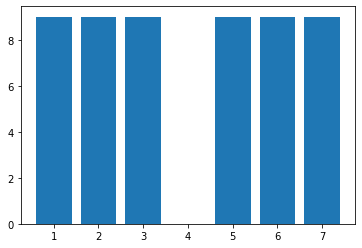

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
X_resampled, y_resampled = RandomUnderSampler(random_state = 0).fit_resample(X,y)
count_and_plot(y_resampled)

### 2) 오버 샘플링
- 상대적으로 적은 클래스의 데이터를 뻥튀기 시켜 늘리는 방법
- 오버 샘플링 방식에는 여러가지가 있으며, 가장 단순한 방식은 동일한 데이터를 똑같이 복사해 수만 늘리는 것
- 이럴 경우 오버피팅의 위험성이 생김

Class=1, n=76 (16.667%)


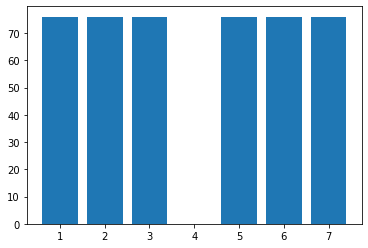

Class=2, n=76 (16.667%)


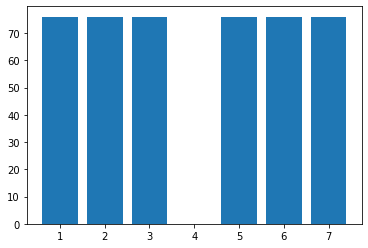

Class=3, n=76 (16.667%)


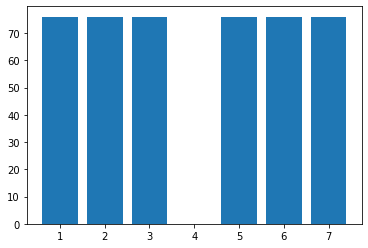

Class=5, n=76 (16.667%)


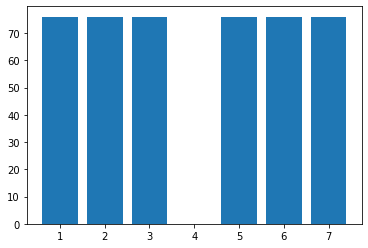

Class=6, n=76 (16.667%)


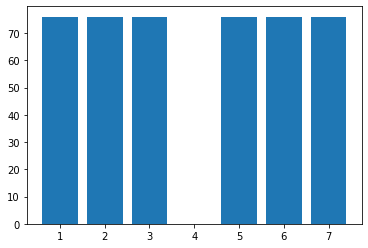

Class=7, n=76 (16.667%)


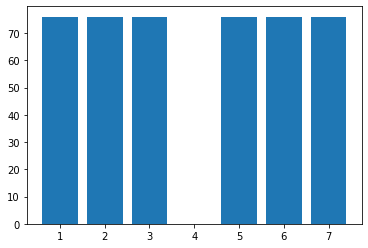

Class=1, n=76 (16.667%)


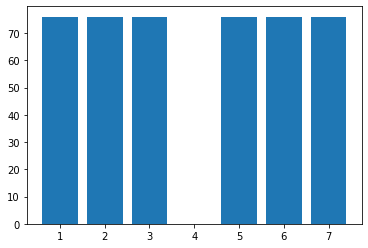

Class=2, n=76 (16.667%)


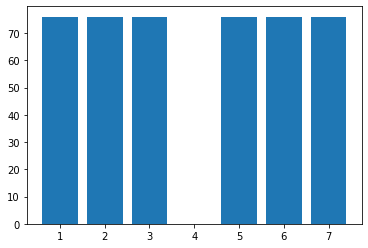

Class=3, n=76 (16.667%)


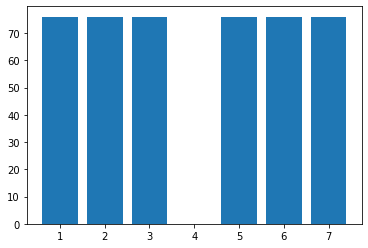

Class=5, n=76 (16.667%)


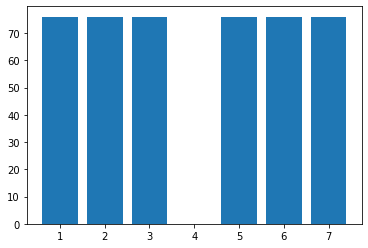

Class=6, n=76 (16.667%)


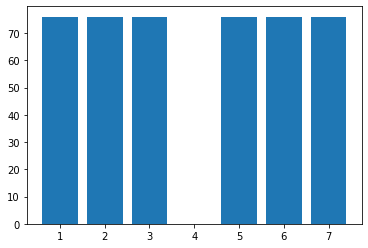

Class=7, n=76 (16.667%)


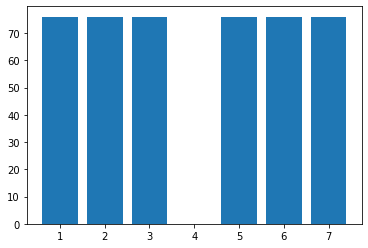

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state =0).fit_resample(X,y)
count_and_plot(y_resampled)

from imblearn.over_sampling import SMOTE 
X_resampled, y_resampled = SMOTE(random_state =0).fit_resample(X,y)
count_and_plot(y_resampled)

### 3) 업 샘플링
- 시계열 데이터 주기를 변환할 때 생기는 결측값을 처리하는 방법
- 데이터가 5초 기준으로 구성되어있다
- 처음 업샘플 데이터를 만듦녀, 5초단위 데이터를 1초단위 데이터로 만들기 때문에, 결측치가 많이 발생한다 (1 ~ 4초 구간은 nan값으로 채워짐)
- 그 다음 ffill() 을 사용하여 값 추가후,
- 선형 변환 linear interpolation 을 통해 최종적으로 값을 변환한다

In [ ]:
import pandas as pd
import numpy as np
rng = pd.date_range('2019-12-31', periods = 3, freq = '5s')

In [ ]:
rng

DatetimeIndex(['2019-12-31 00:00:00', '2019-12-31 00:00:05',
               '2019-12-31 00:00:10'],
              dtype='datetime64[ns]', freq='5S')

In [ ]:
ts = pd.DataFrame(np.array([0, 1, 3, 2, 10, 3]).reshape(3,2), 
                  index = rng,
                  columns = ['col1','col2'])

In [ ]:
# resample() 메소드를 사용하여, 5초 데이터를 1초 데이터로 unsampling 변환을 시도
ts_upsample = ts.resample('S').mean()
ts_upsample

,col1,col2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,NaN,NaN
2019-12-31 00:00:02,NaN,NaN
2019-12-31 00:00:03,NaN,NaN
2019-12-31 00:00:04,NaN,NaN
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,NaN,NaN
2019-12-31 00:00:07,NaN,NaN
2019-12-31 00:00:08,NaN,NaN
2019-12-31 00:00:09,NaN,NaN


In [ ]:
# 위의 upsampling 으로 인해 생긴 결측값을 (1) 채우기filling (2) 선형보간 linear interpolation 시도

# (1) filing forward 앞에 있는 값으로 뒤의 결측치 채우기
ts_upsample.ffill()
ts_upsample.fillna(method = 'ffill')
ts_upsample.fillna(method = 'pad')

,col1,col2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.0,1.0
2019-12-31 00:00:02,0.0,1.0
2019-12-31 00:00:03,0.0,1.0
2019-12-31 00:00:04,0.0,1.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,3.0,2.0
2019-12-31 00:00:08,3.0,2.0
2019-12-31 00:00:09,3.0,2.0


In [ ]:
# 2) 뒤의 값으로 앞의 결측값 채우기
ts_upsample.bfill() 
ts_upsample.fillna(method = 'bfill') 
ts_upsample.fillna(method = 'backfill')

,col1,col2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,3.0,2.0
2019-12-31 00:00:02,3.0,2.0
2019-12-31 00:00:03,3.0,2.0
2019-12-31 00:00:04,3.0,2.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,10.0,3.0
2019-12-31 00:00:07,10.0,3.0
2019-12-31 00:00:08,10.0,3.0
2019-12-31 00:00:09,10.0,3.0


In [ ]:
# 3) fill missing value with 0
ts_upsample.fillna(0)

,col1,col2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.0,0.0
2019-12-31 00:00:02,0.0,0.0
2019-12-31 00:00:03,0.0,0.0
2019-12-31 00:00:04,0.0,0.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,0.0,0.0
2019-12-31 00:00:07,0.0,0.0
2019-12-31 00:00:08,0.0,0.0
2019-12-31 00:00:09,0.0,0.0


In [ ]:
# 4) filling with mean value
# mean per columns
ts_upsample.mean() # 우선 mean 을 만들고
ts_upsample.fillna(ts_upsample.mean())

,col1,col2
2019-12-31 00:00:00,0.000000,1.0
2019-12-31 00:00:01,4.333333,2.0
2019-12-31 00:00:02,4.333333,2.0
2019-12-31 00:00:03,4.333333,2.0
2019-12-31 00:00:04,4.333333,2.0
2019-12-31 00:00:05,3.000000,2.0
2019-12-31 00:00:06,4.333333,2.0
2019-12-31 00:00:07,4.333333,2.0
2019-12-31 00:00:08,4.333333,2.0
2019-12-31 00:00:09,4.333333,2.0


In [ ]:
# 5) 결측값 채우는 행 갯수 제한
ts_upsample.ffill(limit=1)

,col1,col2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.0,1.0
2019-12-31 00:00:02,NaN,NaN
2019-12-31 00:00:03,NaN,NaN
2019-12-31 00:00:04,NaN,NaN
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,NaN,NaN
2019-12-31 00:00:08,NaN,NaN
2019-12-31 00:00:09,NaN,NaN


In [ ]:
# 6) linear interpolation by values
ts_upsample.interpolate(method= 'values')

,col1,col2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.6,1.2
2019-12-31 00:00:02,1.2,1.4
2019-12-31 00:00:03,1.8,1.6
2019-12-31 00:00:04,2.4,1.8
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,4.4,2.2
2019-12-31 00:00:07,5.8,2.4
2019-12-31 00:00:08,7.2,2.6
2019-12-31 00:00:09,8.6,2.8


In [ ]:
# 7) linear interpolation by time 
ts_upsample.interpolate(method = 'time')

,col1,col2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.6,1.2
2019-12-31 00:00:02,1.2,1.4
2019-12-31 00:00:03,1.8,1.6
2019-12-31 00:00:04,2.4,1.8
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,4.4,2.2
2019-12-31 00:00:07,5.8,2.4
2019-12-31 00:00:08,7.2,2.6
2019-12-31 00:00:09,8.6,2.8


### 4) 다운 샘플링
- downsampling 은 더 낮은 주기 (더 큰 덩어리) 로 집계 / 요약하는 방식
- (예: 초(seconds) --> 10초(10 seconds), 일(day) --> 주(week))

In [ ]:
import pandas as pd

dates = pd.date_range('2020-12-31', periods = 6, freq = 'min')
ts_series = pd.Series(range(len(dates)), index = dates)
ts_series

2020-12-31 00:00:00    0
2020-12-31 00:01:00    1
2020-12-31 00:02:00    2
2020-12-31 00:03:00    3
2020-12-31 00:04:00    4
2020-12-31 00:05:00    5
Freq: T, dtype: int64

In [ ]:
# 위의 1분단위주기를 2분 단위주기로 변경하는 다운 샘플링 진행
# closed = left/ right 과 label = left/right 의 파라미터 설정의 결과물 비교
# label = left 라고 한다면, 해당 라벨을 '왼쪽' 이라고 쓴다는 것, 어떤 묶음 처리의 가장 첫부분으로 사용
# label = right 라고 한다면, 해당 라벨을 '오른쪽' 으로 쓴다는 것
# 가장 처음 등장하는 라벨부터 적용
# closed 는 실제 value 를 기준으로, 어떻게 처리할 지 이야기 해주는 부분

In [ ]:
# closed = left / label = 'left'
ts_series = pd.Series(range(len(dates)), index = dates)
ts_series.resample('2min').sum() # 2분 단위로 더하기
ts_series.resample('2min', closed = 'left', label = 'left').sum()

2020-12-31 00:00:00    1
2020-12-31 00:02:00    5
2020-12-31 00:04:00    9
Freq: 2T, dtype: int64

In [ ]:
ts_series = pd.Series(range(len(dates)), index = dates)
ts_series

2020-12-31 00:00:00    0
2020-12-31 00:01:00    1
2020-12-31 00:02:00    2
2020-12-31 00:03:00    3
2020-12-31 00:04:00    4
2020-12-31 00:05:00    5
Freq: T, dtype: int64

In [ ]:
# closed = right / label = left
ts_series = pd.Series(range(len(dates)), index = dates)
ts_series.resample('2min').sum() # 2분 단위로 더하기
ts_series.resample('2min', closed = 'right', label = 'left').sum()

2020-12-30 23:58:00    0
2020-12-31 00:00:00    3
2020-12-31 00:02:00    7
2020-12-31 00:04:00    5
Freq: 2T, dtype: int64

In [ ]:
# closed = left / label = right
ts_series = pd.Series(range(len(dates)), index = dates)
ts_series.resample('2min').sum() # 2분 단위로 더하기
ts_series.resample('2min', closed = 'left', label = 'right').sum()

2020-12-31 00:02:00    1
2020-12-31 00:04:00    5
2020-12-31 00:06:00    9
Freq: 2T, dtype: int64

In [ ]:
# closed = right / label = right
# 시계열 구간의 오른쪽을 포함
# 라벨 이름도 오른쪽 구간 값을 가져옴
ts_series = pd.Series(range(len(dates)), index = dates)
ts_series.resample('2min').sum() # 2분 단위로 더하기
ts_series.resample('2min', closed = 'right', label = 'right').sum()

2020-12-31 00:00:00    0
2020-12-31 00:02:00    3
2020-12-31 00:04:00    7
2020-12-31 00:06:00    5
Freq: 2T, dtype: int64

## 특징 선택 : feature Selection


1) 분산
2) 단일변수 선택3) 특성중요도 계산


1. filter methods
2. wrapper methods
3. embedded methods
4. hybrid methods

### 1. filter methods
- 교차검증 성능 대신 일변량 통계를 통해 측정된 기능의 고유 속성을 선택
- wrapper 방법보다 빠르고 적은 계산비용이 듦

#### 1)   information gain
- 엔트로피 감소를 계산

In [ ]:
from sklearn.feature_selection import nutual_info_classif
import matpltlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, dataframe.columns[0:len(dataframe.column) - 1])
feat_importances.plot(kind= 'barh', color = 'teal')
plt.show()

ImportError: ignored

#### 2) 카이제곱검정
- 데이터 세트 내 범주형 데이터에 적용
- 각 feature 와 target 간의 카이제곱을 계산하고,카이제곱 점수가 가장 높은 feature 의 수를 선택
- 데이터셋의 다양한 features - target 간의 관계를 테스트하기 위해 적용할 때 사용
- 변수는 범주형 / 독립적으로 샘플링 / 5이상의 예상빈도

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# 카테고리변수는 정수로 변환
X_cat = X.astype(int)

#3개의 피쳐 중 가장 높은 카이제곱 통계량을 보이는 것을 선택
chi2_features = SelectKBest(chi2, k =3)
X_kbest_features = chi2_features.fit_transform(X_cat, Y)

# 피쳐 감소
print('original feature number: ', X_cat.shape[1])
print('Reduced feature number: ', X_kbest_features.shape[1])

#### 3) 피셔의 점수
- 피셔 점수는 가장 널리 사용되는 방법 중 하나
- 알고리즘은 피셔점수를 기반으로 변수의 순위 내림차순으로 반환하여 변수 선택이 가능

In [ ]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

# 점수 계산
ranks = fisher_score.fisher_score(X, Y)

# rank 그리기
feat_importances = pd.Series(ranks, dataframe.columns[0: len(dataframe.columns) -1])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

#### 4) 상관계수
- 2개 이상의 변수의 선형관계를 측정한 것
- 상관관계를 통해 우리는 하나의 변수를 다른 변수로부터 예측이 가능하다